In [34]:
# If autocompletion does not works , 
%config Completer.use_jedi = False

In [26]:
import re
import pandas as pd 
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt 


In [14]:
pd.set_option('display.max_colwidth',200)

In [15]:
# !unzip 'archive.zip'

In [16]:
questions_df= pd.read_csv('archive/Questions.csv', encoding='latin-1')

In [17]:
tag_df = pd.read_csv('archive/Tags.csv')

In [18]:
questions_df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,6,5.0,2010-07-19T19:14:44Z,272,The Two Cultures: statistics vs. machine learning?,"<p>Last year, I read a blog post from <a href=""http://anyall.org/"">Brendan O'Connor</a> entitled <a href=""http://anyall.org/blog/2008/12/statistics-vs-machine-learning-fight/"">""Statistics vs. Mach..."
1,21,59.0,2010-07-19T19:24:36Z,4,Forecasting demographic census,<p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census blocks vary in sizes as rural\n...
2,22,66.0,2010-07-19T19:25:39Z,208,Bayesian and frequentist reasoning in plain English,<p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n
3,31,13.0,2010-07-19T19:28:44Z,138,What is the meaning of p values and t values in statistical tests?,"<p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk banging is interpreting the results of statistical hypothesis tests...."
4,36,8.0,2010-07-19T19:31:47Z,58,Examples for teaching: Correlation does not mean causation,"<p>There is an old saying: ""Correlation does not mean causation"". When I teach, I tend to use the following standard examples to illustrate this point:</p>\n\n<ol>\n<li>number of storks and birth ..."


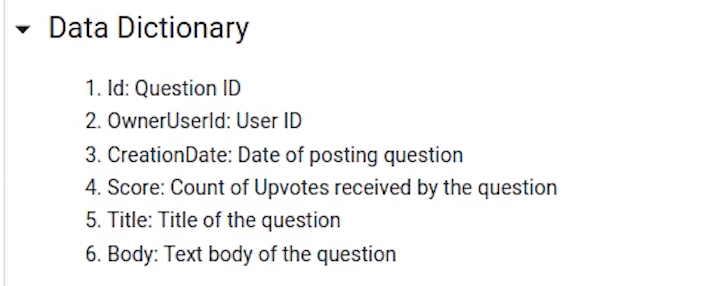

In [19]:
tag_df.head()

,Id,Tag
0,1,bayesian
1,1,prior
2,1,elicitation
3,2,distributions
4,2,normality


# Text Cleaning 

In [28]:
def cleaner(text):
    #take of the html tag
    text = BeautifulSoup(text).get_text()
    
    #fetch the alphabetics characters 
    text= re.sub("[^a-zA-Z]"," ", text)
    
    #convert to lower case 
    text = text.lower()
    
    #split text into tokens to remove whitespace
    tokens = text.split()
    return " ".join(tokens)

In [29]:
questions_df['cleaned_text'] = questions_df['Body'].apply(cleaner)

In [30]:
questions_df["Body"][1]

"<p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census blocks vary in sizes as rural\nareas are a lot larger than condensed\nurban areas. Is there a need to account for the area size difference?</li>\n<li>if let's say I have census data\ndating back to 4 - 5 census periods,\nhow far can i forecast it into the\nfuture?</li>\n<li>if some of the census zone change\nlightly in boundaries, how can i\naccount for that change?</li>\n<li>What are the methods to validate\ncensus forecasts? for example, if i\nhave data for existing 5 census\nperiods, should I model the first 3\nand test it on the latter two? or is\nthere another way?</li>\n<li>what's the state of practice in\nforecasting census data, and what are\nsome of the state of the art methods?</li>\n</ul>\n"

In [31]:
questions_df["cleaned_text"][1]

'what are some of the ways to forecast demographic census with some validation and calibration techniques some of the concerns census blocks vary in sizes as rural areas are a lot larger than condensed urban areas is there a need to account for the area size difference if let s say i have census data dating back to census periods how far can i forecast it into the future if some of the census zone change lightly in boundaries how can i account for that change what are the methods to validate census forecasts for example if i have data for existing census periods should i model the first and test it on the latter two or is there another way what s the state of practice in forecasting census data and what are some of the state of the art methods'

In [32]:
len(tag_df['Tag'].unique())

1315

In [33]:
tag_df['Tag'].value_counts()

r                           13236
regression                  10959
machine-learning             6089
time-series                  5559
probability                  4217
                            ...  
fused-lasso                     1
pit                             1
network-layout                  1
law-of-total-expectation        1
mcar                            1
Name: Tag, Length: 1315, dtype: int64

In [35]:
# group the tags by ID wise 
#remove the "-" from the tags 

tag_df['Tag'] = tag_df['Tag'].apply( lambda x: re.sub('-'," ",x) )
tag_df = tag_df.groupby('Id').apply( lambda x: x['Tag'].values).reset_index(name='tags')
tag_df.head()

,Id,tags
0,1,"[bayesian, prior, elicitation]"
1,2,"[distributions, normality]"
2,3,"[software, open source]"
3,4,"[distributions, statistical significance]"
4,6,[machine learning]


In [37]:
#merge tags and Id 
df = pd.merge(questions_df, tag_df, how='inner', on='Id')

In [38]:
df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,cleaned_text,tags
0,6,5.0,2010-07-19T19:14:44Z,272,The Two Cultures: statistics vs. machine learning?,"<p>Last year, I read a blog post from <a href=""http://anyall.org/"">Brendan O'Connor</a> entitled <a href=""http://anyall.org/blog/2008/12/statistics-vs-machine-learning-fight/"">""Statistics vs. Mach...",last year i read a blog post from brendan o connor entitled statistics vs machine learning fight that discussed some of the differences between the two fields andrew gelman responded favorably to ...,[machine learning]
1,21,59.0,2010-07-19T19:24:36Z,4,Forecasting demographic census,<p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census blocks vary in sizes as rural\n...,what are some of the ways to forecast demographic census with some validation and calibration techniques some of the concerns census blocks vary in sizes as rural areas are a lot larger than conde...,"[forecasting, population, census]"
2,22,66.0,2010-07-19T19:25:39Z,208,Bayesian and frequentist reasoning in plain English,<p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n,how would you describe in plain english the characteristics that distinguish bayesian from frequentist reasoning,"[bayesian, frequentist]"
3,31,13.0,2010-07-19T19:28:44Z,138,What is the meaning of p values and t values in statistical tests?,"<p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk banging is interpreting the results of statistical hypothesis tests....",after taking a statistics course and then trying to help fellow students i noticed one subject that inspires much head desk banging is interpreting the results of statistical hypothesis tests it s...,"[hypothesis testing, t test, p value, interpretation, intuition]"
4,36,8.0,2010-07-19T19:31:47Z,58,Examples for teaching: Correlation does not mean causation,"<p>There is an old saying: ""Correlation does not mean causation"". When I teach, I tend to use the following standard examples to illustrate this point:</p>\n\n<ol>\n<li>number of storks and birth ...",there is an old saying correlation does not mean causation when i teach i tend to use the following standard examples to illustrate this point number of storks and birth rate in denmark number of ...,"[correlation, teaching]"


In [39]:
df = df[['Id', 'Body', 'cleaned_text','tags']]

In [40]:
df.head()

,Id,Body,cleaned_text,tags
0,6,"<p>Last year, I read a blog post from <a href=""http://anyall.org/"">Brendan O'Connor</a> entitled <a href=""http://anyall.org/blog/2008/12/statistics-vs-machine-learning-fight/"">""Statistics vs. Mach...",last year i read a blog post from brendan o connor entitled statistics vs machine learning fight that discussed some of the differences between the two fields andrew gelman responded favorably to ...,[machine learning]
1,21,<p>What are some of the ways to forecast demographic census with some validation and calibration techniques?</p>\n\n<p>Some of the concerns:</p>\n\n<ul>\n<li>Census blocks vary in sizes as rural\n...,what are some of the ways to forecast demographic census with some validation and calibration techniques some of the concerns census blocks vary in sizes as rural areas are a lot larger than conde...,"[forecasting, population, census]"
2,22,<p>How would you describe in plain English the characteristics that distinguish Bayesian from Frequentist reasoning?</p>\n,how would you describe in plain english the characteristics that distinguish bayesian from frequentist reasoning,"[bayesian, frequentist]"
3,31,"<p>After taking a statistics course and then trying to help fellow students, I noticed one subject that inspires much head-desk banging is interpreting the results of statistical hypothesis tests....",after taking a statistics course and then trying to help fellow students i noticed one subject that inspires much head desk banging is interpreting the results of statistical hypothesis tests it s...,"[hypothesis testing, t test, p value, interpretation, intuition]"
4,36,"<p>There is an old saying: ""Correlation does not mean causation"". When I teach, I tend to use the following standard examples to illustrate this point:</p>\n\n<ol>\n<li>number of storks and birth ...",there is an old saying correlation does not mean causation when i teach i tend to use the following standard examples to illustrate this point number of storks and birth rate in denmark number of ...,"[correlation, teaching]"


In [41]:
df.shape

(85085, 4)

In [42]:
#  Dataset preparartion   [forecasting, population, census]
freq = {}

for i in df['tags']:
    for j in i:
        if j in freq.keys():
            freq[j] = freq[j] + 1
        else:
            freq[j] = 1
        

In [ ]:
freq.items()

In [45]:
#sort in the dictonary in descending order 
freq = dict(sorted(freq.items(), key=lambda x:x[1], reverse=True))

In [ ]:
freq.items()

In [47]:
#find top 10 tags 
common_tags = list(freq.keys())[:10]
common_tags

['r',
 'regression',
 'machine learning',
 'time series',
 'probability',
 'hypothesis testing',
 'self study',
 'distributions',
 'logistic',
 'classification']

In [64]:
len(df['tags'])

85085

We will consider only the top 10 tags as for the rare tags we dont have lots of data for training the model 


In [48]:
x = []
y = []

for i in range(len(df['tags'])):
    temp=[]
    for j in df['tags'][i]:
        if j in common_tags:
            temp.append(j)
    
    if(len(temp) > 1):
        x.append(df['cleaned_text'][i])
        y.append(temp)
    
    

In [49]:
len(x)   # no of questions left 

11106

In [50]:
y[:10]

[['r', 'time series'],
 ['regression', 'distributions'],
 ['distributions', 'probability', 'hypothesis testing'],
 ['hypothesis testing', 'self study'],
 ['r', 'regression', 'time series'],
 ['r', 'time series', 'self study'],
 ['probability', 'hypothesis testing'],
 ['r', 'regression'],
 ['r', 'regression'],
 ['regression', 'logistic']]

In [51]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

#ONE HOT ENcoding of y 
y = mlb.fit_transform(y)
y.shape

(11106, 10)

In [54]:
y[0,:]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [53]:
mlb.classes_

array(['classification', 'distributions', 'hypothesis testing',
       'logistic', 'machine learning', 'probability', 'r', 'regression',
       'self study', 'time series'], dtype=object)

In [56]:
# split the data into test and validation set 

from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x,y, test_size=0.2, random_state=0, shuffle=True)

# Text Representation

In [57]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer()

x_tokenizer.fit_on_texts(x_tr)  #fit in training set

In [ ]:
x_tokenizer.word_index


#{'the': 1,
# 'i': 2,
# 'to': 3,
# 'a': 4,
# 'of': 5,
# 'is': 6,
# 'and': 7,
# 'in': 8,

In [59]:
len(x_tokenizer.word_index)

25315

In [ ]:
x_tokenizer.word_counts

The are 25315 tokens in the trainind dataset, lets see how many token appear atleasr 3 times in dataset

In [60]:
thresh = 3

cnt = 0

for key, value in x_tokenizer.word_counts.items():
    if value >= thresh:
        cnt = cnt + 1

print(cnt)


12575


Over 12000 have appeared more than 3 times in data 

In [61]:
#prepare the token again 
x_tokenizer = Tokenizer(num_words=cnt, oov_token='unk')

#prepare vocabulary 
x_tokenizer.fit_on_texts(x_tr)

Now we have encoded every token into integer , lets convert the text sequences into integer sequences .
After that we will pad the integer sequences to the maximum sequence length of 100

In [68]:
#maximum sequence length allowed 
max_len=100

#convet text sequence into integer sequence
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

#padding up to zero 
x_tr_seq = pad_sequences(x_tr_seq, padding='post', maxlen= max_len)
x_val_seq = pad_sequences(x_val_seq, padding='post', maxlen=max_len)

maxlen is hyper parameter  \
Since we are padding the sequences with zeros , we must increment the vocabulary size by one

In [69]:
#no of unique words 

x_voc_size = x_tokenizer.num_words + 1
x_voc_size

12576

In [70]:
x_tr_seq[1]

array([    1,     2,  1291,     2,    38,   103,    23,    14,   211,
          80,    56,   404,   205,    19,   719,    60,     4,    81,
         295,     5,   100,   359,    38,   103,    23,  1129,     4,
         458,    25,  1803,   125,    13,     2,   151,     7,    47,
         439,   120,    33,   295,  3270,     2,  2025,   211,    62,
        2534,     2,   522,     7,  4451,  1239,    40,     3,   115,
           4,   187,    15,   678,    30,   307,  2252,    66,   101,
        1136, 10608,    13,     3,   268,    23,   432,   176,  1209,
          59,  8207,    49,     7,   131,   111,     4,    98,   102,
          14,   389,  3662,   901,   422,    47,     2,    14,    13,
           7,   714,     7,    44,    63,   291,    17,     4,   304,
          19])

# Model building 

In [73]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *

In [153]:
# Define a model Architecture 

model = Sequential()
model.add(Embedding(x_voc_size, 50, input_shape=(max_len,), mask_zero=True))  #will not allow loss for padding token 
#model.add(SimpleRNN(128, activation='relu'))
model.add(LSTM(128))
#model.add(GRU(128))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="sigmoid"))


In [154]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           628800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 738,250
Trainable params: 738,250
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Compile the model 
model.compile(optimizer="adam", loss='binary_crossentropy')

In [156]:
mc = ModelCheckpoint("weights.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [171]:
model.fit(x_tr_seq, y_tr, batch_size=128, epochs=10, verbose=1, validation_data=(x_val_seq, y_val), callbacks=[mc])

Epoch 1/10
70/70 [==============================] - ETA: 0s - loss: 0.2458
Epoch 00001: val_loss improved from 0.34545 to 0.33852, saving model to weights.best.hdf5
70/70 [==============================] - 11s 161ms/step - loss: 0.2458 - val_loss: 0.3385
Epoch 2/10
70/70 [==============================] - ETA: 0s - loss: 0.2275
Epoch 00002: val_loss did not improve from 0.33852
70/70 [==============================] - 12s 167ms/step - loss: 0.2275 - val_loss: 0.3407
Epoch 3/10
70/70 [==============================] - ETA: 0s - loss: 0.2095
Epoch 00003: val_loss did not improve from 0.33852
70/70 [==============================] - 12s 168ms/step - loss: 0.2095 - val_loss: 0.3450
Epoch 4/10
70/70 [==============================] - ETA: 0s - loss: 0.1939
Epoch 00004: val_loss did not improve from 0.33852
70/70 [==============================] - 12s 166ms/step - loss: 0.1939 - val_loss: 0.3426
Epoch 5/10
70/70 [==============================] - ETA: 0s - loss: 0.1765
Epoch 00005: val_loss 

# Model Predictions 

Load the  best model weights and now model is ready for predictions 

In [172]:
model.load_weights("weights.best.hdf5")

In [173]:
preb_prob = model.predict(x_val_seq)

In [174]:
preb_prob[0]

array([0.00222695, 0.0075464 , 0.00713986, 0.01350868, 0.0440647 ,
       0.00196448, 0.97347414, 0.5917334 , 0.00800368, 0.27082407],
      dtype=float32)

The predictions are in terms of probabilites of each of the 10 tags \
Hence we need to have a threshould value to convert these probabilites to 0 or 1


In [175]:
#define a candidate threshold value 

import numpy as np
threshold = np.arange(0,0.5,0.01)
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

In [176]:
# convert probabilites to tags or classes based on threshold value 
 
def classify(preb_prob, thresh):
    y_pred_seq = []
    
    for i in preb_prob:
        temp=[]
        for j in i:
            if j >= thresh:
                temp.append(1)
            else:
                temp.append(0)
        y_pred_seq.append(temp)
    return y_pred_seq

In [177]:
# F1 score 
from sklearn import metrics

score = []

#convert to 1 array
y_true = np.array(y_val).ravel()

for thresh in threshold:
    #classed for each threshold 
    y_pred_seq = classify(preb_prob, thresh)
    
    #convert to 1d array
    y_pred = np.array(y_pred_seq).ravel()
    
    score.append(metrics.f1_score(y_true,y_pred))


In [178]:
# find optimal threshold value 
opt = threshold[score.index(max(score))]
opt

0.29

# Model Evaluatoion

In [179]:
#predictions for optimal threshold 

y_pred_seq = classify(preb_prob, opt)
y_pred = np.array(y_pred_seq).ravel()

In [180]:
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     17520
           1       0.60      0.74      0.66      4700

    accuracy                           0.84     22220
   macro avg       0.76      0.80      0.78     22220
weighted avg       0.86      0.84      0.85     22220



In [181]:
y_pred = mlb.inverse_transform(np.array(y_pred_seq))
y_true = mlb.inverse_transform(np.array(y_val))

df = pd.DataFrame({'comment':x_val, 'actual':y_true,'predictions':y_pred})

In [182]:
df.sample(10)

,comment,actual,predictions
246,i have built a logistic regression where the outcome variable is being cured after receiving treatment cure vs no cure all patients in this study received treatment i am interested in seeing if ha...,"(hypothesis testing, logistic, r)","(logistic, r, regression)"
5,the function powertranform from the car package in r mentions the following code for box cox transformation for multiple regression summary p powertransform cycles len amp load wool fit linear mod...,"(r, regression)","(r, regression)"
1066,suppose i have a decision tree built and in the training set there are two points say x and x which are completely equal what happens if i remove exactly one of them from the training data will th...,"(classification, machine learning)","(classification, machine learning)"
1908,i compared chinese and german websites and found that out of use the same design so i got a probability of right is there a way to find out if that probability is statistically significant or is a...,"(hypothesis testing, probability)","(hypothesis testing, regression, self study)"
567,i run a gamma glm using categorical predictors year with classes organ with classes site with classes my model is glm glm biom fyear organ site fyear organ fyear site organ site data data family g...,"(hypothesis testing, r)","(r, regression)"
431,two common methods of testing whether a time series is stationary are the kpss and adf tests if my understanding is correct these tests essentially work by measuring the residuals of fitting the t...,"(hypothesis testing, time series)","(hypothesis testing, regression, time series)"
462,i admittedly am horrible at statistics i know that the probability of an individual who has saved for retirement has saved less then usd is according to my sample data but only of workers say they...,"(distributions, self study)","(distributions, probability, self study)"
1,i have recently been into machine learning so far i learned that in supervised learning the result of regression is often a real number for example in linear regression outcome y is a real number ...,"(machine learning, regression)","(logistic, machine learning, regression)"
1864,i ve come across a problem that i m trying to understand there is a chance that it will not rain on some given day but if it does rain then the probability of a certain amount of rainfall r sim ex...,"(probability, self study)","(distributions, probability, self study)"
291,i try to model currency rates volatility using garch models through the rugarch package in r starting from the observed currency rate series i compute the log return through data diff log series l...,"(r, time series)","(r, time series)"


# Inference

In [183]:
def predict_tag(comment):
    text=[]
    
    #preprocess
    text = [cleaner(comment)]
    
    #convert to integer sequences 
    seq = x_tokenizer.texts_to_sequences(text)
    
    #pad the sequences 
    pad_seq = pad_sequences(seq, padding='post', maxlen=max_len)
    
    #make predictions
    pred_prob = model.predict(pad_seq)
    classes = classify(preb_prob,opt)[0]
    
    classes = np.array([classes])
    classes = mlb.inverse_transform(classes)
    return classes

In [185]:
comment="In this logistic regression, the learning function is sigmoid function that tries to separate 2 classes"
print("Comment ", comment)
print('Predicted Tags', predict_tag(comment))

Comment  In this logistic regression, the learning function is sigmoid function that tries to separate 2 classes
Predicted Tags [('r', 'regression')]
